# Our database with companies that left Russia in 2022

In [1]:
import pandas as pd

In [2]:
df_actions_tone = pd.read_csv("new database with Actions.csv")
df_int = pd.read_excel("new database with INT.xlsx")
spark = pd.read_csv("spark.csv", delimiter=";")

In [3]:
df_actions_tone = df_actions_tone.drop('Unnamed: 0', axis = 1)
df_actions_tone = df_actions_tone.rename(columns = {'tone': 'Tone'})
df_actions_tone = df_actions_tone.sort_values(by='Company')
df_actions_tone = df_actions_tone.reset_index(drop=True)
df_actions_tone.head(1)

,Company,Action,Industry,Country,Tone
0,1840 & Company,"['suspend', 'aesthetics', 'operations', ',', '...",Health Care,United States,2


In [4]:
df_int = df_int.rename(columns={'i': 'Company'})
df_int = df_int.rename(columns={'ИНН': 'INT'})
df_int = df_int.sort_values(by='Company')
df_int = df_int.reset_index(drop=True)
df_int.head(1)

,Company,Action,Industry,Country,INT
0,1840 & Company,"suspend aesthetics operations, pause new clini...",Health Care,United States,7743855873


In [5]:
df1 = df_actions_tone.copy()
df2 = df_int.copy()

# Merge the two datasets based on the "Company" column
data = pd.merge(df1, df2, on='Company')
data.head(1)

,Company,Action_x,Industry_x,Country_x,Tone,Action_y,Industry_y,Country_y,INT
0,1840 & Company,"['suspend', 'aesthetics', 'operations', ',', '...",Health Care,United States,2,"suspend aesthetics operations, pause new clini...",Health Care,United States,7743855873


In [6]:
# Select the desired columns
desired_columns = ['Company', 'Action_x', 'Industry_x', 'Country_x', 'Tone', 'INT']
data = data[desired_columns]
data.head(1)

,Company,Action_x,Industry_x,Country_x,Tone,INT
0,1840 & Company,"['suspend', 'aesthetics', 'operations', ',', '...",Health Care,United States,2,7743855873


In [7]:
# Rename the columns
data.columns = ['Company', 'Action', 'Industry', 'Country', 'Tone', 'INT']

In [8]:
data

,Company,Action,Industry,Country,Tone,INT
0,1840 & Company,"['suspend', 'aesthetics', 'operations', ',', '...",Health Care,United States,2,7743855873
1,1Password,"['suspend', 'new', 'investments/development']",Consumer Discretionary,France,2,7704662187
2,1xBet,"['ending', 'new', 'investments', 'where', 'has...",Financials,Netherlands,0,NaN
3,3HC Semiconductors,"['some', 'clients', 'no', 'longer', 'supplied'...",Materials,France,0,3528103017
4,3M,"['suspend', 'supply', 'of', 'parts', 'and', 'd...",Industrials,Netherlands,1,9704116463
...,...,...,...,...,...,...
3339,"Французский автомобильный концерн Re...""","['no', 'new', 'investments']",Utilities,France,0,5003026630
3340,Хостинг Ukraine,"['ban', 'people', 'with', 'ties', 'to', 'russi...",NGO,Germany,0,7453231464
3341,Шальке,"['no', 'new', 'business']",Industrials,Denmark,0,NaN
3342,Эвертон,"['stopped', 'renewing', 'and', 'underwriting',...",Financials,United States,0,6829067343


# Spark database

In [9]:
spark.head()

,№,Наименование,Регистрационный номер,Наименование на английском,Краткое наименование,Дата регистрации,"Возраст компании, лет",Код налогоплательщика,Вид деятельности/отрасль,Организационно-правовая форма,...,"2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB"
0,1,"3М ВОЛГА, ООО",1.121674e+12,"3M VOLGA, OOO","ООО""3М ВОЛГА""",16.08.2012,"10,5",1646033450,Торговля оптовая прочими бытовыми товарами,Общества с ограниченной ответственностью,...,13 300 000,104 722 000,218 916 000,19 484 000,153 458 000,-154 449 000,-147 371 000,-135 529 000,-196 685 000,-172 832 000
1,2,"CCC, ООО",1.198617e+12,"OOO C, CJSC","ООО ""CCC""",18.06.2019,"3,5",8608060872,Строительство инженерных коммуникаций для водо...,Общества с ограниченной ответственностью,...,NaN,NaN,NaN,65 126 000,47 022 000,NaN,NaN,-381 000,8 130 000,213 000
2,3,"WIX-SZ, ООО",1.133538e+12,"WIX-SZ, OOO","ООО ""WIX-SZ""",12.02.2013,"10,0",3526030067,"Работы строительные специализированные прочие,...",Общества с ограниченной ответственностью,...,18 049 000,11 592 000,5 157 000,11 399 000,15 481 000,558 000,548 000,279 000,422 000,543 000
3,4,"А.С. ГРУПП, ООО",1.192375e+12,"A.S. GROUP, LLC","ООО ""А.С. ГРУПП""",16.04.2019,"4,0",2310213891,Консультирование по вопросам коммерческой деят...,Общества с ограниченной ответственностью,...,NaN,NaN,1 586 000,5 833 000,NaN,NaN,NaN,-2 667 000,-914 000,NaN
4,5,"АББ, ООО",1.027739e+12,"ABB, OOO","ООО ""АББ""",13.12.2000,"22,0",7727180430,Торговля оптовая производственным электротехни...,Общества с ограниченной ответственностью,...,21 012 268 000,23 143 045 000,22 362 311 000,23 544 957 000,23 339 744 000,1 908 551 000,1 011 902 000,1 142 817 000,-33 797 000,1 555 765 000


<span style="font-size: 17px;"> Delete all unnecessary columns

In [10]:
columns_to_drop = ['№', 'Наименование', 'Краткое наименование', 'Регистрационный номер', 'Дата регистрации']
spark = spark.drop(columns_to_drop, axis=1)

In [11]:
print(spark.columns)

Index(['Наименование на английском', 'Возраст компании, лет',
       'Код налогоплательщика', 'Вид деятельности/отрасль',
       'Организационно-правовая форма', 'Форма собственности',
       'Размер компании', '2017, Среднесписочная численность работников',
       '2018, Среднесписочная численность работников',
       '2019, Среднесписочная численность работников',
       '2020, Среднесписочная численность работников',
       '2021, Среднесписочная численность работников', 'Мои списки',
       '2017, Выручка, RUB', '2018, Выручка, RUB', '2019, Выручка, RUB',
       '2020, Выручка, RUB', '2021, Выручка, RUB',
       '2017, Прибыль (убыток) до налогообложения , RUB',
       '2018, Прибыль (убыток) до налогообложения , RUB',
       '2019, Прибыль (убыток) до налогообложения , RUB',
       '2020, Прибыль (убыток) до налогообложения , RUB',
       '2021, Прибыль (убыток) до налогообложения , RUB'],
      dtype='object')


<span style="font-size: 17px;"> Rename columns 'Наименование на английском' and 'Код налогоплательщика' to 'Company' and 'INT'

In [12]:
spark = spark.rename(columns={"Наименование на английском": "Company"})
spark = spark.rename(columns={"Код налогоплательщика": "INT"})
# spark['Company'] = spark['Company'].str.lower()

In [13]:
spark.head(1)

,Company,"Возраст компании, лет",INT,Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2019, Среднесписочная численность работников",...,"2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB"
0,"3M VOLGA, OOO","10,5",1646033450,Торговля оптовая прочими бытовыми товарами,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Малые предприятия,4,8,7,...,13 300 000,104 722 000,218 916 000,19 484 000,153 458 000,-154 449 000,-147 371 000,-135 529 000,-196 685 000,-172 832 000


# Merging two databases into one

In [14]:
df_merged = data.merge(spark, on='INT')

In [15]:
df_merged.head(30)

,Company_x,Action,Industry,Country,Tone,INT,Company_y,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,...,"2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB"
0,1840 & Company,"['suspend', 'aesthetics', 'operations', ',', '...",Health Care,United States,2,7743855873,"EBBVI, OOO","10,5",Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,...,10 254 588 000,9 951 071 000,10 208 217 000,11 038 418 000,10 107 069 000,39 767 000,115 612 000,-98 477 000,436 625 000,492 786 000
1,3HC Semiconductors,"['some', 'clients', 'no', 'longer', 'supplied'...",Materials,France,0,3528103017,"ALS, AO","17,5",Производство промышленных газов,Непубличные акционерные общества,...,4 241 597 000,4 085 493 000,4 219 756 000,4 261 008 000,3 935 799 000,1 758 438 000,1 923 752 000,2 082 180 000,2 148 197 000,2 038 560 000
2,3M,"['suspend', 'supply', 'of', 'parts', 'and', 'd...",Industrials,Netherlands,1,9704116463,"AIRBUS, LLC","1,0",Деятельность туристических агентств,Общества с ограниченной ответственностью,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAK,"['suspended', 'some', 'shipments']",Information Technology,Japan,0,7714391842,"FUDZHIFILM RUS, OOO","29,0",Торговля оптовая неспециализированная,Общества с ограниченной ответственностью,...,3 178 782 000,3 672 729 000,2 898 280 000,2 800 149 000,3 410 160 000,117 504 000,49 294 000,188 041 000,265 433 000,446 284 000
4,ABC,"['no', 'new', 'business', 'in', 'russia']",Consumer Discretionary,Austria,0,9715417769,"HERZ GROUP RUS, LLC","0,5",Торговля оптовая водопроводным и отопительным ...,Общества с ограниченной ответственностью,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ABC News,"['suspend', 'new', 'investments', 'in', 'russia']",Industrials,United States,2,7728053385,"UPDK-KHAINS, OOO","31,0",Управление недвижимым имуществом за вознагражд...,Общества с ограниченной ответственностью,...,NaN,NaN,NaN,NaN,NaN,-27 000,-657 000,-473 000,-115 000,-83 000
6,ACCA,"['suspend', 'new', 'investment', 'in', 'russia']",Industrials,France,2,7725704127,"ID LOGISTIKS RUS, OOO","12,5",Деятельность по складированию и хранению,Общества с ограниченной ответственностью,...,1 230 715 000,1 627 697 000,2 572 849 000,2 239 789 000,2 639 568 000,80 349 000,-79 454 000,-168 129 000,65 183 000,140 244 000
7,ADAMA,"['no', 'further', 'investments/clinical', 'tri...",Health Care,United States,0,7701620453,"MERCK LIFE SCIENCE, LLC","17,5",Деятельность предпринимательских членских неко...,Общества с ограниченной ответственностью,...,502 171 000,780 527 000,831 842 000,1 349 847 000,1 831 439 000,102 374 000,91 240 000,54 501 000,306 309 000,346 203 000
8,ADM,"['pause', 'all', 'new', 'capital', 'investment...",Health Care,Switzerland,0,7705772224,"NOVARTIS FARMA, OOO","16,0",Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,...,18 184 446 000,21 894 506 000,28 138 077 000,31 854 990 000,39 722 228 000,-46 362 000,991 082 000,161 520 000,88 970 000,559 463 000
9,ADP,"['no', 'new', 'russian', 'investments', ';', '...",Energy,Austria,0,7728139307,"OMV, OOO","26,5",Деятельность по финансовой аренде (лизингу/суб...,Общества с ограниченной ответственностью,...,4 295 000,3 292 000,5 660 000,7 350 000,7 103 000,-58 000,-3 088 000,845 000,2 063 000,1 690 000


In [16]:
df_merged = df_merged.rename(columns={"Company_y": "Company"})

df_merged = df_merged.drop({'Company_x', 'INT', 
                          '2017, Среднесписочная численность работников', 
                          '2018, Среднесписочная численность работников', 
                          '2019, Среднесписочная численность работников',
                          '2020, Среднесписочная численность работников', 
                          '2021, Среднесписочная численность работников',
                          'Мои списки'}, axis=1)

In [17]:
df_merged = df_merged[['Company', 'Industry', 'Country', 'Action', 'Tone', 'Возраст компании, лет',
       'Вид деятельности/отрасль', 'Организационно-правовая форма',
       'Форма собственности', 'Размер компании', '2017, Выручка, RUB',
       '2018, Выручка, RUB', '2019, Выручка, RUB', '2020, Выручка, RUB',
       '2021, Выручка, RUB', '2017, Прибыль (убыток) до налогообложения , RUB',
       '2018, Прибыль (убыток) до налогообложения , RUB',
       '2019, Прибыль (убыток) до налогообложения , RUB',
       '2020, Прибыль (убыток) до налогообложения , RUB',
       '2021, Прибыль (убыток) до налогообложения , RUB']]

In [18]:
df_merged.head()

,Company,Industry,Country,Action,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,"2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB"
0,"EBBVI, OOO",Health Care,United States,"['suspend', 'aesthetics', 'operations', ',', '...",2,"10,5",Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,10 254 588 000,9 951 071 000,10 208 217 000,11 038 418 000,10 107 069 000,39 767 000,115 612 000,-98 477 000,436 625 000,492 786 000
1,"ALS, AO",Materials,France,"['some', 'clients', 'no', 'longer', 'supplied'...",0,"17,5",Производство промышленных газов,Непубличные акционерные общества,Совместная частная и иностранная собственность,Крупные предприятия,4 241 597 000,4 085 493 000,4 219 756 000,4 261 008 000,3 935 799 000,1 758 438 000,1 923 752 000,2 082 180 000,2 148 197 000,2 038 560 000
2,"AIRBUS, LLC",Industrials,Netherlands,"['suspend', 'supply', 'of', 'parts', 'and', 'd...",1,"1,0",Деятельность туристических агентств,Общества с ограниченной ответственностью,Частная собственность,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"FUDZHIFILM RUS, OOO",Information Technology,Japan,"['suspended', 'some', 'shipments']",0,"29,0",Торговля оптовая неспециализированная,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,3 178 782 000,3 672 729 000,2 898 280 000,2 800 149 000,3 410 160 000,117 504 000,49 294 000,188 041 000,265 433 000,446 284 000
4,"HERZ GROUP RUS, LLC",Consumer Discretionary,Austria,"['no', 'new', 'business', 'in', 'russia']",0,"0,5",Торговля оптовая водопроводным и отопительным ...,Общества с ограниченной ответственностью,Частная собственность,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
database = df_merged.copy()

<span style="font-size: 17px;"> The column 'Возраст компании, лет' is of string datatype. To make it float datatype, we replace , with . 

In [20]:
if database['Возраст компании, лет'].dtype == object:
        # Replace commas with periods in the column
        database['Возраст компании, лет'] = database['Возраст компании, лет'].str.replace(',', '.')
database['Возраст компании, лет'] = database['Возраст компании, лет'].astype(float)

<span style="font-size: 17px;"> Some columns has big number with spaces, therefore they are of a string type.  To make them float datatype, we delete all unnecassary spaces

In [21]:
database['2017, Выручка, RUB'] = database['2017, Выручка, RUB'].str.replace(' ', '').astype(float)
database['2018, Выручка, RUB'] = database['2018, Выручка, RUB'].str.replace(' ', '').astype(float)
database['2019, Выручка, RUB'] = database['2019, Выручка, RUB'].str.replace(' ', '').astype(float)
database['2020, Выручка, RUB'] = database['2020, Выручка, RUB'].str.replace(' ', '').astype(float)
database['2021, Выручка, RUB'] = database['2021, Выручка, RUB'].str.replace(' ', '').astype(float)
database['2017, Прибыль (убыток) до налогообложения , RUB'] = database['2017, Прибыль (убыток) до налогообложения , RUB'].str.replace(' ', '').astype(float)
database['2018, Прибыль (убыток) до налогообложения , RUB'] = database['2018, Прибыль (убыток) до налогообложения , RUB'].str.replace(' ', '').astype(float)
database['2019, Прибыль (убыток) до налогообложения , RUB'] = database['2019, Прибыль (убыток) до налогообложения , RUB'].str.replace(' ', '').astype(float)
database['2020, Прибыль (убыток) до налогообложения , RUB'] = database['2020, Прибыль (убыток) до налогообложения , RUB'].str.replace(' ', '').astype(float)
database['2021, Прибыль (убыток) до налогообложения , RUB'] = database['2021, Прибыль (убыток) до налогообложения , RUB'].str.replace(' ', '').astype(float)

In [22]:
database.head(5)

,Company,Industry,Country,Action,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,"2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB"
0,"EBBVI, OOO",Health Care,United States,"['suspend', 'aesthetics', 'operations', ',', '...",2,10.5,Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1.025459e+10,9.951071e+09,1.020822e+10,1.103842e+10,1.010707e+10,3.976700e+07,1.156120e+08,-9.847700e+07,4.366250e+08,4.927860e+08
1,"ALS, AO",Materials,France,"['some', 'clients', 'no', 'longer', 'supplied'...",0,17.5,Производство промышленных газов,Непубличные акционерные общества,Совместная частная и иностранная собственность,Крупные предприятия,4.241597e+09,4.085493e+09,4.219756e+09,4.261008e+09,3.935799e+09,1.758438e+09,1.923752e+09,2.082180e+09,2.148197e+09,2.038560e+09
2,"AIRBUS, LLC",Industrials,Netherlands,"['suspend', 'supply', 'of', 'parts', 'and', 'd...",1,1.0,Деятельность туристических агентств,Общества с ограниченной ответственностью,Частная собственность,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"FUDZHIFILM RUS, OOO",Information Technology,Japan,"['suspended', 'some', 'shipments']",0,29.0,Торговля оптовая неспециализированная,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,3.178782e+09,3.672729e+09,2.898280e+09,2.800149e+09,3.410160e+09,1.175040e+08,4.929400e+07,1.880410e+08,2.654330e+08,4.462840e+08
4,"HERZ GROUP RUS, LLC",Consumer Discretionary,Austria,"['no', 'new', 'business', 'in', 'russia']",0,0.5,Торговля оптовая водопроводным и отопительным ...,Общества с ограниченной ответственностью,Частная собственность,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Handling missing values

<span style="font-size: 17px;"> Count total NaN at each column in a database

In [23]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", database.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Company                                              0
Industry                                             0
Country                                              0
Action                                               0
Tone                                                 0
Возраст компании, лет                                0
Вид деятельности/отрасль                             0
Организационно-правовая форма                        0
Форма собственности                                  0
Размер компании                                     77
2017, Выручка, RUB                                 123
2018, Выручка, RUB                                 111
2019, Выручка, RUB                                 104
2020, Выручка, RUB                                 100
2021, Выручка, RUB                                 106
2017, Прибыль (убыток) до налогообложения , RUB    110
2018, Прибыль (убыток) до налогообложения , RUB    103
2019, Прибыл

<span style="font-size: 17px;"> Visualize missing values in dataset

In [24]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<span style="font-size: 17px;"> Visualize the number of missing values as a bar chart

<AxesSubplot:>

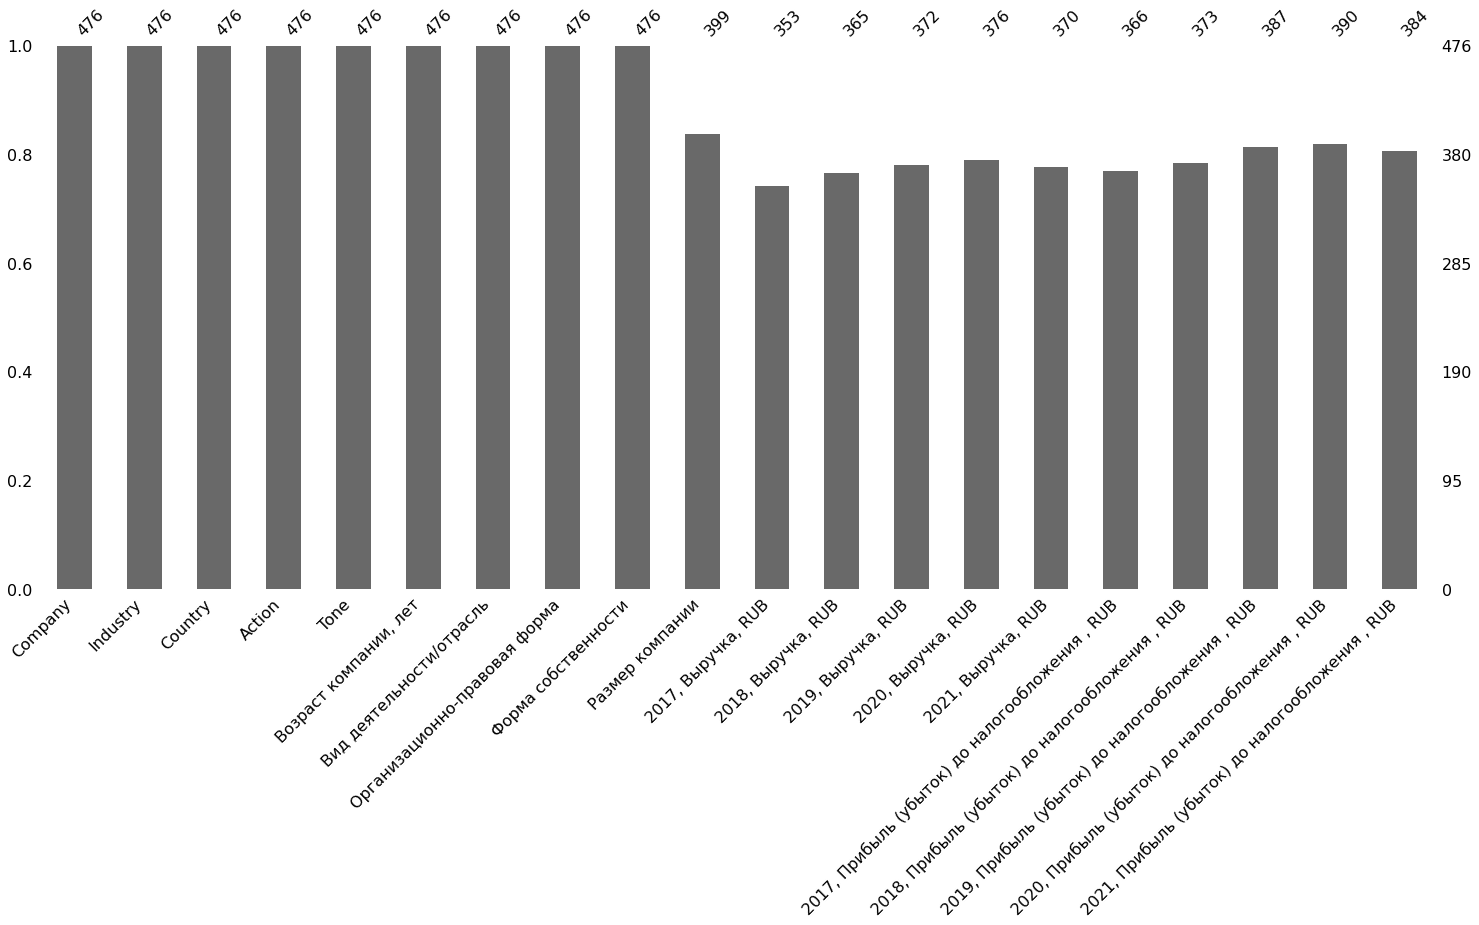

In [25]:
import missingno as msno
msno.bar(database)

<span style="font-size: 17px;"> Visualize the correlation between the number of missing values in different columns as a heatmap.

<span style="font-size: 17px;"> As we see below, there is a diagonal with values 0.9, which means that profit and insome highly correlates in terms of null values (if profit value is present, then income value is likely to be present too)

<AxesSubplot:>

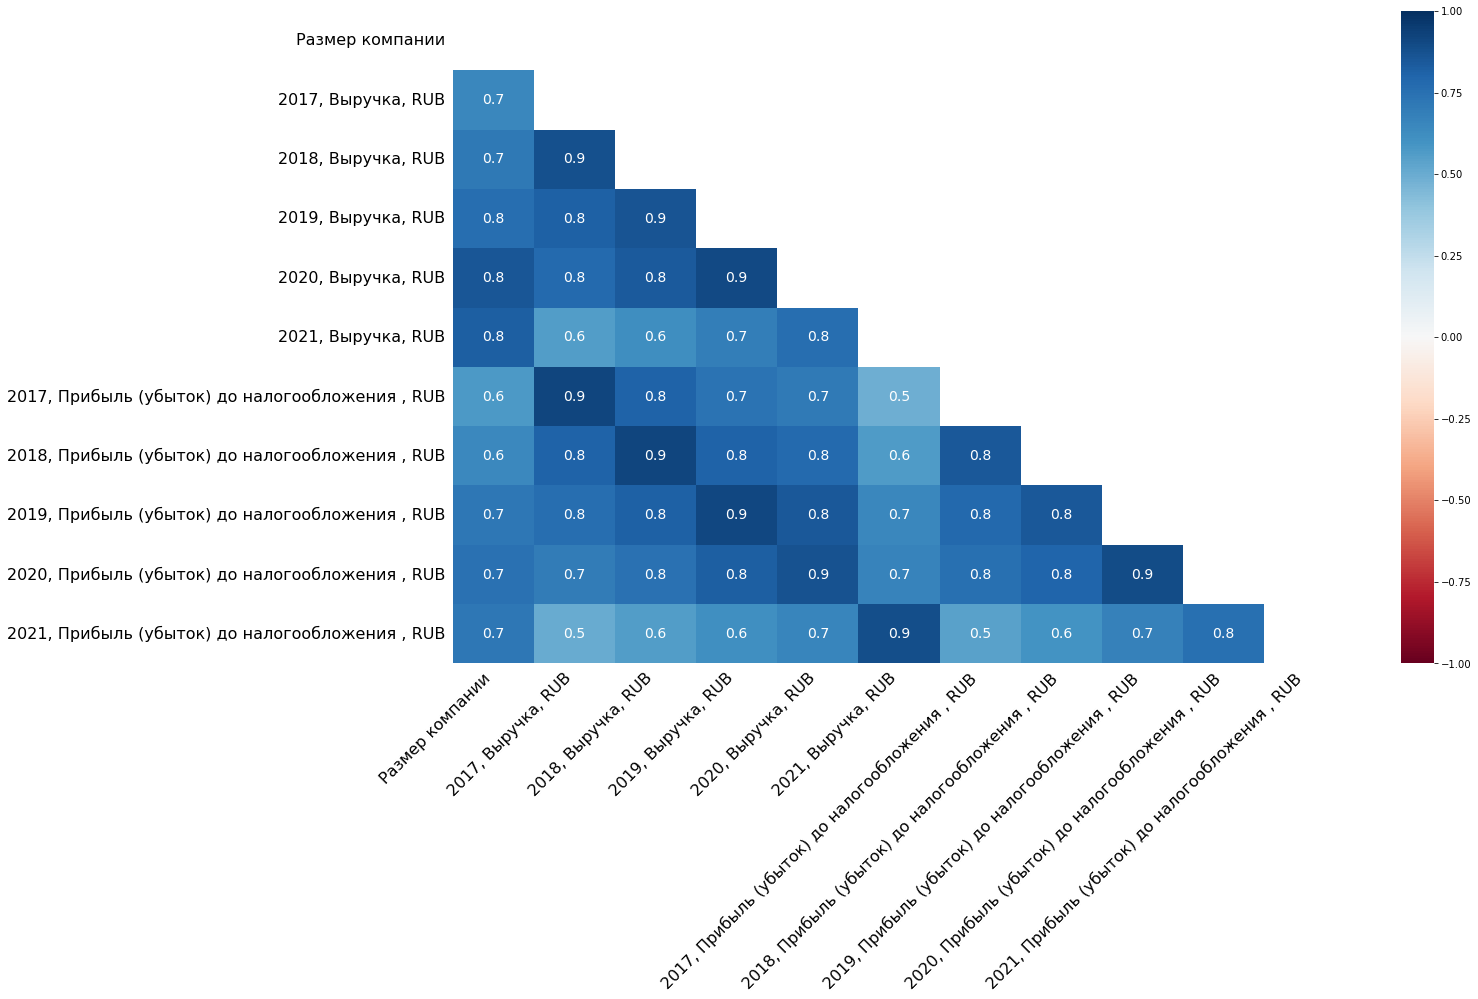

In [26]:
msno.heatmap(database)

<span style="font-size: 17px;"> Delete all rows where more than 6 NaN values exist

In [27]:
database.dropna(thresh=database.shape[1] - 6, inplace=True)

In [28]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", database.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Company                                             0
Industry                                            0
Country                                             0
Action                                              0
Tone                                                0
Возраст компании, лет                               0
Вид деятельности/отрасль                            0
Организационно-правовая форма                       0
Форма собственности                                 0
Размер компании                                    10
2017, Выручка, RUB                                 38
2018, Выручка, RUB                                 26
2019, Выручка, RUB                                 18
2020, Выручка, RUB                                 14
2021, Выручка, RUB                                 34
2017, Прибыль (убыток) до налогообложения , RUB    30
2018, Прибыль (убыток) до налогообложения , RUB    20
2019, Прибыль (убыток) до нал

In [29]:
database.shape

(389, 20)

<span style="font-size: 17px;"> Delete all rows where Nan values exist

In [30]:
columns=['2017, Выручка, RUB', '2018, Выручка, RUB', '2019, Выручка, RUB', '2020, Выручка, RUB', '2021, Выручка, RUB']
dfs = [database.dropna(subset=[col]) for col in columns]

# Drop rows with NaN values for each profit column separately
intersection_indices = set(dfs[0].index).intersection(*[df.index for df in dfs[1:]])

# Select rows with indices present in the intersection
df_filtered = database.loc[intersection_indices]
df_filtered.reset_index(drop=True, inplace=True)
print(" \nCount total NaN at each column in a DataFrame : \n\n", df_filtered.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Company                                            0
Industry                                           0
Country                                            0
Action                                             0
Tone                                               0
Возраст компании, лет                              0
Вид деятельности/отрасль                           0
Организационно-правовая форма                      0
Форма собственности                                0
Размер компании                                    0
2017, Выручка, RUB                                 0
2018, Выручка, RUB                                 0
2019, Выручка, RUB                                 0
2020, Выручка, RUB                                 0
2021, Выручка, RUB                                 0
2017, Прибыль (убыток) до налогообложения , RUB    1
2018, Прибыль (убыток) до налогообложения , RUB    2
2019, Прибыль (убыток) до налогообложения , RU

In [31]:
# New dataset without NaN values in columns:
# Возраст компании, лет                               
# Вид деятельности/отрасль                            
# Организационно-правовая форма                       
# Форма собственности                                 
# Размер компании                                     
# 2017, Выручка, RUB                                  
# 2018, Выручка, RUB                                  
# 2019, Выручка, RUB                                  
# 2020, Выручка, RUB                                  
# 2021, Выручка, RUB

df_filtered.shape

(318, 20)

# Clusterisation (k-prototypes)

<span style="font-size: 17px;"> Delete columns that has NaN values in it

In [32]:
database2 = database.drop({'Company', 'Industry', 'Country', '2017, Выручка, RUB',
       '2018, Выручка, RUB', '2019, Выручка, RUB', '2020, Выручка, RUB',
       '2021, Выручка, RUB', '2017, Прибыль (убыток) до налогообложения , RUB',
       '2018, Прибыль (убыток) до налогообложения , RUB',
       '2019, Прибыль (убыток) до налогообложения , RUB',
       '2020, Прибыль (убыток) до налогообложения , RUB',
       '2021, Прибыль (убыток) до налогообложения , RUB', 'Размер компании'}, axis = 1)

In [33]:
database2.head(1)

,Action,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности
0,"['suspend', 'aesthetics', 'operations', ',', '...",2,10.5,Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц


In [34]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [35]:
import numpy as np
from kmodes.kprototypes import KPrototypes

In [36]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", database2.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Action                           0
Tone                             0
Возраст компании, лет            0
Вид деятельности/отрасль         0
Организационно-правовая форма    0
Форма собственности              0
dtype: int64


In [37]:
mark_array=database2.values

<span style="font-size: 17px;"> Mark columns that has float datatypes

In [40]:
mark_array[:, 2] = mark_array[:, 2].astype(float)

In [41]:
mark_array

array([["['suspend', 'aesthetics', 'operations', ',', 'pause', 'new', 'clinical', 'trials']",
        2, 10.5, 'Торговля оптовая фармацевтической продукцией',
        'Общества с ограниченной ответственностью',
        'Собственность иностранных юридических лиц'],
       ["['some', 'clients', 'no', 'longer', 'supplied', ',', 'others', 'scaled', 'down', ';', 'all', 'russian', 'investments', 'on', 'hold']",
        0, 17.5, 'Производство промышленных газов',
        'Непубличные акционерные общества',
        'Совместная частная и иностранная собственность'],
       ["['suspended', 'some', 'shipments']", 0, 29.0,
        'Торговля оптовая неспециализированная',
        'Общества с ограниченной ответственностью',
        'Собственность иностранных юридических лиц'],
       ...,
       ["['suspend', 'new', 'investments', 'and', 'clinical', 'trials']",
        2, 24.5, 'Торговля оптовая фармацевтической продукцией',
        'Общества с ограниченной ответственностью',
        'Собственность 

In [43]:
kproto = KPrototypes(n_clusters=5, verbose=2,max_iter=30)
clusters = kproto.fit_predict(mark_array, categorical=[0, 1, 3, 4, 5])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/30, moves: 60, ncost: 5232.724214234601
Run: 1, iteration: 2/30, moves: 10, ncost: 5215.046505491844
Run: 1, iteration: 3/30, moves: 0, ncost: 5215.046505491844
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/30, moves: 153, ncost: 5527.991205519489
Run: 2, iteration: 2/30, moves: 52, ncost: 5295.7226028966115
Run: 2, iteration: 3/30, moves: 9, ncost: 5278.919033775564
Run: 2, iteration: 4/30, moves: 2, ncost: 5278.034358282318
Run: 2, iteration: 5/30, moves: 0, ncost: 5278.034358282318
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/30, moves: 96, ncost: 5463.6399273676825
Run: 3, iteration: 2/30, moves: 45, ncost: 5279.559541363909
Run: 3, iteration: 3/30, moves: 29, ncost: 5237.680231425399
Run: 3, iterat

In [44]:
print(kproto.cluster_centroids_)

[['27.96323529411765' "['suspend', 'all', 'shipments', 'to', 'russia']"
  '0' 'Торговля оптовая фармацевтической продукцией'
  'Общества с ограниченной ответственностью'
  'Собственность иностранных юридических лиц']
 ['20.65625' "['suspend', 'all', 'shipments', 'to', 'russia']" '0'
  'Разработка компьютерного программного обеспечения'
  'Общества с ограниченной ответственностью'
  'Собственность иностранных юридических лиц']
 ['5.978260869565218' "['suspend', 'all', 'shipments', 'to', 'russia']"
  '0'
  'Торговля оптовая машинами и оборудованием для добычи полезных ископаемых и строительства'
  'Общества с ограниченной ответственностью'
  'Собственность иностранных юридических лиц']
 ['15.922131147540984' "['suspend', 'all', 'shipments', 'to', 'russia']"
  '0' 'Торговля оптовая фармацевтической продукцией'
  'Общества с ограниченной ответственностью'
  'Собственность иностранных юридических лиц']
 ['10.636986301369863' "['suspend', 'operations', 'in', 'russia']" '0'
  'Разработка комп

In [45]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)

In [46]:
cluster_dict

[4,
 3,
 0,
 0,
 4,
 3,
 3,
 0,
 4,
 0,
 3,
 1,
 3,
 2,
 1,
 3,
 3,
 3,
 1,
 0,
 0,
 1,
 3,
 1,
 3,
 3,
 0,
 4,
 3,
 3,
 1,
 3,
 1,
 3,
 3,
 1,
 1,
 4,
 1,
 0,
 1,
 3,
 1,
 1,
 1,
 3,
 1,
 2,
 0,
 4,
 0,
 1,
 1,
 4,
 0,
 4,
 3,
 3,
 2,
 2,
 4,
 1,
 3,
 0,
 1,
 3,
 1,
 3,
 3,
 2,
 3,
 3,
 1,
 0,
 1,
 3,
 3,
 4,
 3,
 0,
 3,
 4,
 0,
 4,
 3,
 3,
 2,
 0,
 0,
 3,
 0,
 1,
 3,
 0,
 4,
 4,
 2,
 1,
 2,
 1,
 1,
 0,
 4,
 3,
 3,
 4,
 3,
 3,
 2,
 3,
 0,
 2,
 2,
 3,
 3,
 0,
 4,
 3,
 3,
 4,
 4,
 1,
 3,
 1,
 4,
 2,
 3,
 0,
 3,
 3,
 0,
 1,
 4,
 4,
 4,
 4,
 4,
 3,
 2,
 1,
 2,
 4,
 1,
 1,
 4,
 3,
 2,
 0,
 3,
 0,
 3,
 4,
 2,
 1,
 3,
 3,
 3,
 4,
 0,
 2,
 4,
 0,
 0,
 4,
 2,
 1,
 1,
 1,
 0,
 3,
 4,
 2,
 4,
 3,
 4,
 1,
 3,
 1,
 2,
 2,
 3,
 2,
 0,
 2,
 1,
 4,
 3,
 4,
 2,
 0,
 1,
 3,
 3,
 2,
 2,
 3,
 0,
 1,
 1,
 3,
 2,
 3,
 4,
 3,
 3,
 4,
 0,
 4,
 3,
 3,
 1,
 3,
 0,
 1,
 2,
 0,
 4,
 3,
 4,
 0,
 3,
 0,
 3,
 3,
 0,
 1,
 4,
 4,
 4,
 1,
 0,
 1,
 2,
 4,
 3,
 1,
 1,
 3,
 3,
 3,
 3,
 4,
 1,
 1,
 0,
 0,
 2,
 4,
 2,
 3,


In [47]:
database2['cluster']=cluster_dict

In [48]:
database2

,Action,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,cluster
0,"['suspend', 'aesthetics', 'operations', ',', '...",2,10.5,Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,4
1,"['some', 'clients', 'no', 'longer', 'supplied'...",0,17.5,Производство промышленных газов,Непубличные акционерные общества,Совместная частная и иностранная собственность,3
3,"['suspended', 'some', 'shipments']",0,29.0,Торговля оптовая неспециализированная,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,0
5,"['suspend', 'new', 'investments', 'in', 'russia']",2,31.0,Управление недвижимым имуществом за вознагражд...,Общества с ограниченной ответственностью,Федеральная собственность,0
6,"['suspend', 'new', 'investment', 'in', 'russia']",2,12.5,Деятельность по складированию и хранению,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,4
...,...,...,...,...,...,...,...
470,"['continue', 'sales', 'in', 'russia', 'but', '...",1,25.0,Производство прочей молочной продукции,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,0
471,"['restructuring', 'finances']",0,15.5,Деятельность по управлению холдинг-компаниями,Общества с ограниченной ответственностью,Совместная частная и иностранная собственность,3
472,"['suspend', 'new', 'investments', 'and', 'clin...",2,24.5,Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,0
473,"['no', 'new', 'investments']",0,24.5,Производство прочего электрического оборудования,Непубличные акционерные общества,Совместная частная и иностранная собственность,0


In [49]:
database2[database2['cluster']== 0].head(10)

,Action,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,cluster
3,"['suspended', 'some', 'shipments']",0,29.0,Торговля оптовая неспециализированная,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,0
5,"['suspend', 'new', 'investments', 'in', 'russia']",2,31.0,Управление недвижимым имуществом за вознагражд...,Общества с ограниченной ответственностью,Федеральная собственность,0
9,"['no', 'new', 'russian', 'investments', ';', '...",0,26.5,Деятельность по финансовой аренде (лизингу/суб...,Общества с ограниченной ответственностью,Частная собственность,0
11,"['halting', 'advertising', 'and', 'promotional...",1,28.0,Торговля оптовая фармацевтической продукцией,Непубличные акционерные общества,Собственность иностранных юридических лиц,0
23,"['stop', 'shipments', 'to', 'russia', ';', 'ma...",0,30.5,Производство удобрений и азотных соединений,Непубличные акционерные общества,Частная собственность,0
24,"['reduced', 'deliveries', 'and', 'supplies', '...",0,30.5,Производство удобрений и азотных соединений,Непубличные акционерные общества,Частная собственность,0
31,"['suspend', 'operations', 'in', 'russia']",2,24.5,Торговля розничная одеждой в специализированны...,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,0
48,"['suspend', 'new', 'investments', 'in', 'russia']",2,26.0,Производство бумажных изделий хозяйственно-быт...,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,0
57,"['stop', 'all', 'new', 'investments', 'and', '...",0,30.5,Производство лекарственных препаратов и матери...,Непубличные акционерные общества,Собственность иностранных юридических лиц,0
59,"['scale', 'back', 'unspecified', 'operations',...",0,29.0,Консультирование по вопросам коммерческой деят...,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,0


In [50]:
database2[database2['cluster']== 1].head(10)

,Action,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,cluster
13,"['stopped', 'new', 'investment', 'and', 'techn...",0,18.5,Предоставление услуг в области добычи нефти и ...,Общества с ограниченной ответственностью,Частная собственность,1
18,"['cancel', 'investments', 'in', 'a', 'brand', ...",0,20.0,Торговля оптовая промышленными химикатами,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,1
22,"['suspend', 'almost', 'all', 'sales', 'in', 'r...",2,23.5,Торговля оптовая изделиями из керамики и стекла,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,1
25,"['suspended', 'sales', 'of', 'global', 'brands...",0,18.5,Производство хлеба и мучных кондитерских издел...,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,1
27,"['stop', 'processing', 'payments', 'to', 'and'...",0,21.5,Деятельность по управлению ценными бумагами,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,1
36,"['stop', 'operations', 'in', 'russia']",0,19.0,Деятельность по предоставлению прочих вспомога...,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,1
38,"['canceled', 'future', 'investments', 'in', 'r...",0,19.5,Деятельность столовых и буфетов при предприяти...,Общества с ограниченной ответственностью,Частная собственность,1
42,"['suspend', 'investments', 'but', 'continues',...",2,23.0,Производство сыра и сырных продуктов,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,1
44,"['suspend', 'new', 'orders', 'and', 'furlough'...",2,22.5,Торговля оптовая программным обеспечением,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,1
47,"['suspend', 'investments']",2,19.0,Предоставление услуг в области добычи нефти и ...,Общества с ограниченной ответственностью,Совместная частная и иностранная собственность,1


In [51]:
database2[database2['cluster']== 2].head(10)

,Action,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,cluster
17,"['suspend', 'only', 'exports', 'to', 'russia',...",2,7.5,Торговля оптовая электрической бытовой техникой,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,2
56,"['stop', 'further', 'investments']",0,7.5,"Производство красок, лаков и аналогичных матер...",Общества с ограниченной ответственностью,Смешанная иностранная собственность,2
68,"['stopped', 'new', 'investments']",0,7.0,Обработка металлов и нанесение покрытий на мет...,Общества с ограниченной ответственностью,Частная собственность,2
69,"['stopped', 'inports/exports', 'and', 'stopped...",0,7.0,Обработка металлов и нанесение покрытий на мет...,Общества с ограниченной ответственностью,Частная собственность,2
82,"['suspend', 'all', 'new', 'investment', 'and',...",2,3.0,"Торговля оптовая изделиями, применяемыми в мед...",Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,2
103,"['stop', 'all', 'exports', ',', 'ikea', 'produ...",0,5.5,Аренда и управление собственным или арендованн...,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,2
116,"['scaling', 'down', 'but', 'still', 'in', 'num...",0,4.0,Торговля оптовая машинами и оборудованием для ...,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,2
118,"['suspend', 'operations', 'except', 'exempt', ...",2,7.0,"Аренда и лизинг прочих машин и оборудования, н...",Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,2
130,"['suspended', 'shipments', 'to', 'russia', 'bu...",1,5.5,"Деятельность в области инженерных изысканий, и...",Общества с ограниченной ответственностью,Частная собственность,2
133,"['suspend', 'new', 'contracts', 'and', 'repatr...",2,7.0,Деятельность страховых агентов и брокеров,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,2


<span style="font-size: 17px;"> Visualisation:

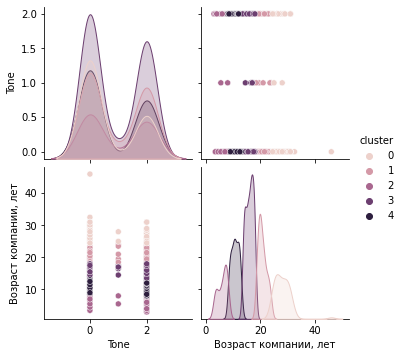

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

database2.columns = ["Action", "Tone", "Возраст компании, лет", "Вид деятельности/отрасль", "Организационно-правовая форма", "Форма собственности", "cluster"]
sns.pairplot(database2, hue="cluster")

<AxesSubplot:xlabel='cluster', ylabel='Возраст компании, лет'>

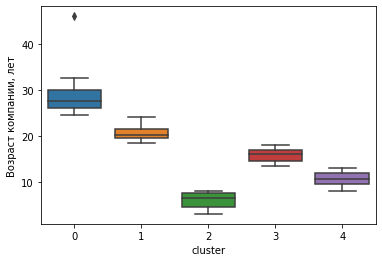

In [54]:
sns.boxplot(x="cluster", y="Возраст компании, лет", data=database2)


<AxesSubplot:xlabel='cluster', ylabel='Организационно-правовая форма'>

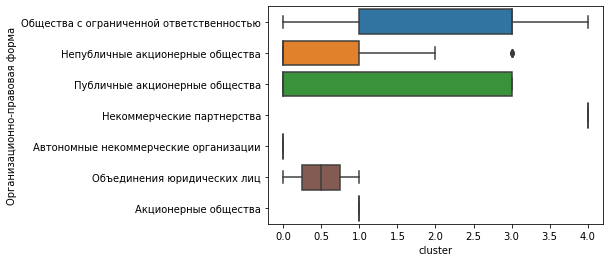

In [55]:
sns.boxplot(x="cluster", y="Организационно-правовая форма", data=database2)

<AxesSubplot:xlabel='cluster', ylabel='Форма собственности'>

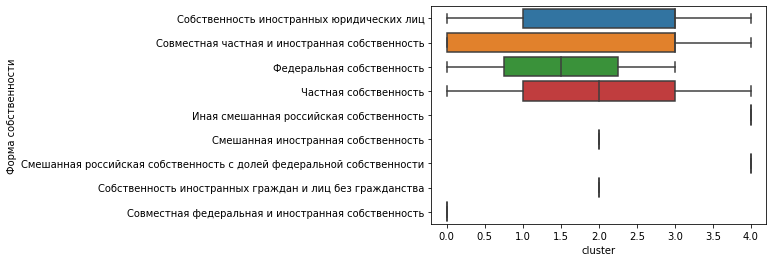

In [56]:
sns.boxplot(x="cluster", y="Форма собственности", data=database2)

### Clusterisation of dataset with profit

In [59]:
df_filtered = df_filtered.drop({'Company', 'Industry', 'Country', '2017, Прибыль (убыток) до налогообложения , RUB',
       '2018, Прибыль (убыток) до налогообложения , RUB',
       '2019, Прибыль (убыток) до налогообложения , RUB',
       '2020, Прибыль (убыток) до налогообложения , RUB',
       '2021, Прибыль (убыток) до налогообложения , RUB'}, axis = 1)

In [60]:
df_filtered.head(1)

,Action,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,"2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB"
0,"['suspend', 'aesthetics', 'operations', ',', '...",2,10.5,Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1.025459e+10,9.951071e+09,1.020822e+10,1.103842e+10,1.010707e+10


In [61]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


<span style="font-size: 17px;"> Check that there are no NaN values in the dataset</span>

In [62]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", df_filtered.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Action                           0
Tone                             0
Возраст компании, лет            0
Вид деятельности/отрасль         0
Организационно-правовая форма    0
Форма собственности              0
Размер компании                  0
2017, Выручка, RUB               0
2018, Выручка, RUB               0
2019, Выручка, RUB               0
2020, Выручка, RUB               0
2021, Выручка, RUB               0
dtype: int64


In [63]:
mark_array=df_filtered.values

<span style="font-size: 17px;"> Mark columns that has float datatypes

In [64]:
mark_array[:, 2] = mark_array[:, 2].astype(float)
mark_array[:, 7] = mark_array[:, 7].astype(float)
mark_array[:, 8] = mark_array[:, 8].astype(float)
mark_array[:, 9] = mark_array[:, 9].astype(float)
mark_array[:, 10] = mark_array[:, 10].astype(float)
mark_array[:,11] = mark_array[:, 11].astype(float)

In [65]:
mark_array

array([["['suspend', 'aesthetics', 'operations', ',', 'pause', 'new', 'clinical', 'trials']",
        2, 10.5, ..., 10208217000.0, 11038418000.0, 10107069000.0],
       ["['some', 'clients', 'no', 'longer', 'supplied', ',', 'others', 'scaled', 'down', ';', 'all', 'russian', 'investments', 'on', 'hold']",
        0, 17.5, ..., 4219756000.0, 4261008000.0, 3935799000.0],
       ["['suspended', 'some', 'shipments']", 0, 29.0, ..., 2898280000.0,
        2800149000.0, 3410160000.0],
       ...,
       ["['suspend', 'new', 'investments', 'and', 'clinical', 'trials']",
        2, 24.5, ..., 7032513000.0, 9600866000.0, 13967025000.0],
       ["['no', 'new', 'investments']", 0, 24.5, ..., 1901000.0,
        3943000.0, 627000.0],
       ["['stopped', 'renewing', 'and', 'underwriting', 'new', 'reinsurance']",
        0, 12.5, ..., 8668000.0, 3597000.0, 3286000.0]], dtype=object)

In [66]:
kproto = KPrototypes(n_clusters=3, verbose=2,max_iter=30)
clusters = kproto.fit_predict(mark_array, categorical=[0, 1, 3, 4, 5, 6])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/30, moves: 25, ncost: 2.0925858417100704e+24
Run: 1, iteration: 2/30, moves: 21, ncost: 1.718305382791324e+24
Run: 1, iteration: 3/30, moves: 10, ncost: 1.1684572433291304e+24
Run: 1, iteration: 4/30, moves: 5, ncost: 7.620530385825632e+23
Run: 1, iteration: 5/30, moves: 4, ncost: 7.380260608990283e+23
Run: 1, iteration: 6/30, moves: 1, ncost: 7.322023742856632e+23
Run: 1, iteration: 7/30, moves: 1, ncost: 7.295770052335453e+23
Run: 1, iteration: 8/30, moves: 0, ncost: 7.295770052335453e+23
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 

In [67]:
print(kproto.cluster_centroids_)

[['29.0' '847094116000.0' '878818369000.0' '906693657000.0'
  '823902628000.0' '778684489000.0'
  "['suspend', 'all', 'shipments', 'to', 'russia']" '2'
  'Торговля розничная преимущественно пищевыми продуктами, включая напитки, и табачными изделиями в неспециализированных магазинах'
  'Непубличные акционерные общества' 'Частная собственность'
  'Крупные предприятия']
 ['22.40909090909091' '144553537090.9091' '171284765818.18182'
  '176975691090.9091' '188214261545.45456' '231840467636.36365'
  "['suspend', 'all', 'shipments', 'to', 'russia']" '0'
  'Торговля розничная мебелью, осветительными приборами и прочими бытовыми изделиями в специализированных магазинах'
  'Общества с ограниченной ответственностью'
  'Собственность иностранных юридических лиц' 'Крупные предприятия']
 ['17.15359477124183' '6677644307.189543' '7452726758.169934'
  '7934992578.431373' '8297454189.542483' '9686443947.712418'
  "['suspend', 'all', 'shipments', 'to', 'russia']" '0'
  'Разработка компьютерного программ

In [68]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)

In [69]:
cluster_dict

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [70]:
df_filtered['cluster']=cluster_dict

In [71]:
df_filtered

,Action,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,"2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB",cluster
0,"['suspend', 'aesthetics', 'operations', ',', '...",2,10.5,Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1.025459e+10,9.951071e+09,1.020822e+10,1.103842e+10,1.010707e+10,2
1,"['some', 'clients', 'no', 'longer', 'supplied'...",0,17.5,Производство промышленных газов,Непубличные акционерные общества,Совместная частная и иностранная собственность,Крупные предприятия,4.241597e+09,4.085493e+09,4.219756e+09,4.261008e+09,3.935799e+09,2
2,"['suspended', 'some', 'shipments']",0,29.0,Торговля оптовая неспециализированная,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,3.178782e+09,3.672729e+09,2.898280e+09,2.800149e+09,3.410160e+09,2
3,"['suspend', 'new', 'investment', 'in', 'russia']",2,12.5,Деятельность по складированию и хранению,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1.230715e+09,1.627697e+09,2.572849e+09,2.239789e+09,2.639568e+09,2
4,"['no', 'further', 'investments/clinical', 'tri...",0,17.5,Деятельность предпринимательских членских неко...,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Средние предприятия,5.021710e+08,7.805270e+08,8.318420e+08,1.349847e+09,1.831439e+09,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,"['continue', 'sales', 'in', 'russia', 'but', '...",1,25.0,Производство прочей молочной продукции,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,8.972674e+09,1.062664e+10,1.196019e+10,1.325493e+10,1.469187e+10,2
314,"['restructuring', 'finances']",0,15.5,Деятельность по управлению холдинг-компаниями,Общества с ограниченной ответственностью,Совместная частная и иностранная собственность,Средние предприятия,7.175280e+08,1.209742e+09,1.535521e+09,1.390812e+09,9.052230e+08,2
315,"['suspend', 'new', 'investments', 'and', 'clin...",2,24.5,Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,5.075134e+09,5.076268e+09,7.032513e+09,9.600866e+09,1.396702e+10,2
316,"['no', 'new', 'investments']",0,24.5,Производство прочего электрического оборудования,Непубличные акционерные общества,Совместная частная и иностранная собственность,Микропредприятия,7.243000e+06,1.044200e+07,1.901000e+06,3.943000e+06,6.270000e+05,2


In [72]:
df_filtered[df_filtered['cluster']== 0].head(10)

,Action,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,"2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB",cluster
122,"['suspend', 'all', 'shipments', 'to', 'russia']",2,29.0,Торговля розничная преимущественно пищевыми пр...,Непубличные акционерные общества,Частная собственность,Крупные предприятия,8.470941e+11,8.788184e+11,9.066937e+11,8.239026e+11,7.786845e+11,0


In [73]:
df_filtered[df_filtered['cluster']== 1].head(10)

,Action,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,"2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB",cluster
28,"['suspend', 'new', 'orders', 'and', 'furlough'...",2,22.5,Торговля оптовая программным обеспечением,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,6.172674e+10,1.323097e+11,1.439452e+11,1.277270e+11,1.127750e+11,1
36,"['stop', 'all', 'growth', 'investments', 'and'...",0,22.0,Торговля розничная преимущественно пищевыми пр...,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,2.316290e+11,2.173980e+11,2.080244e+11,2.240148e+11,2.211986e+11,1
52,"['stopped', 'new', 'investments', ',', 'import...",0,19.5,"Торговля розничная мебелью, осветительными при...",Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,2.266872e+11,2.757957e+11,3.114671e+11,3.471628e+11,4.566317e+11,1
82,"['suspend', 'operations', 'in', 'russia', 'exc...",2,21.0,Производство безалкогольных напитков ароматизи...,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1.027258e+11,1.144148e+11,1.234249e+11,1.320954e+11,1.608320e+11,1
83,"['explore', 'strategic', 'alternatives', ',', ...",0,26.5,Производство табачных изделий,Непубличные акционерные общества,Собственность иностранных юридических лиц,Крупные предприятия,7.216300e+10,1.058883e+11,1.112230e+11,1.157647e+11,1.308831e+11,1
102,"['suspend', 'all', 'official', 'site', 'sales'...",2,11.0,"Торговля оптовая компьютерами, периферийными у...",Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1.519265e+11,1.972491e+11,1.892786e+11,2.663132e+11,3.860330e+11,1
120,"['freeze', 'activities', 'in', 'russia']",0,32.5,Производство грузовых автомобилей,Публичные акционерные общества,Совместная частная и иностранная собственность,Крупные предприятия,1.452165e+11,1.511003e+11,1.608157e+11,1.868886e+11,2.483892e+11,1
142,"['suspend', 'all', 'shipments', 'to', 'russia']",2,16.5,Производство автотранспортных средств,Общества с ограниченной ответственностью,Федеральная собственность,Крупные предприятия,1.058378e+11,1.195378e+11,1.079439e+11,9.865680e+10,1.002058e+11,1
175,"['suspend', 'all', 'shipments', 'to', 'russia']",2,28.5,Торговля автотранспортными средствами,Непубличные акционерные общества,Собственность иностранных юридических лиц,Крупные предприятия,1.662981e+11,1.762087e+11,1.832450e+11,1.918045e+11,2.748041e+11,1
262,"['fold', 'up', 'russian', 'presence']",0,16.5,"Торговля розничная мебелью, осветительными при...",Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,9.205210e+10,1.024571e+11,1.153552e+11,1.230779e+11,1.572577e+11,1


In [74]:
df_filtered[df_filtered['cluster']== 2].head(10)

,Action,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,"2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB",cluster
0,"['suspend', 'aesthetics', 'operations', ',', '...",2,10.5,Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1.025459e+10,9.951071e+09,1.020822e+10,1.103842e+10,1.010707e+10,2
1,"['some', 'clients', 'no', 'longer', 'supplied'...",0,17.5,Производство промышленных газов,Непубличные акционерные общества,Совместная частная и иностранная собственность,Крупные предприятия,4.241597e+09,4.085493e+09,4.219756e+09,4.261008e+09,3.935799e+09,2
2,"['suspended', 'some', 'shipments']",0,29.0,Торговля оптовая неспециализированная,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,3.178782e+09,3.672729e+09,2.898280e+09,2.800149e+09,3.410160e+09,2
3,"['suspend', 'new', 'investment', 'in', 'russia']",2,12.5,Деятельность по складированию и хранению,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1.230715e+09,1.627697e+09,2.572849e+09,2.239789e+09,2.639568e+09,2
4,"['no', 'further', 'investments/clinical', 'tri...",0,17.5,Деятельность предпринимательских членских неко...,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Средние предприятия,5.021710e+08,7.805270e+08,8.318420e+08,1.349847e+09,1.831439e+09,2
5,"['pause', 'all', 'new', 'capital', 'investment...",0,16.0,Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1.818445e+10,2.189451e+10,2.813808e+10,3.185499e+10,3.972223e+10,2
6,"['no', 'new', 'russian', 'investments', ';', '...",0,26.5,Деятельность по финансовой аренде (лизингу/суб...,Общества с ограниченной ответственностью,Частная собственность,Микропредприятия,4.295000e+06,3.292000e+06,5.660000e+06,7.350000e+06,7.103000e+06,2
7,"['still', 'operating', 'in', 'russia', ';', 'n...",0,11.5,Сбор отходов,Общества с ограниченной ответственностью,Иная смешанная российская собственность,Средние предприятия,2.438790e+08,6.206170e+08,7.373760e+08,8.172890e+08,8.572780e+08,2
8,"['halting', 'advertising', 'and', 'promotional...",1,28.0,Торговля оптовая фармацевтической продукцией,Непубличные акционерные общества,Собственность иностранных юридических лиц,Крупные предприятия,4.855209e+10,5.282835e+10,5.364004e+10,5.769086e+10,5.106336e+10,2
9,"['new', 'projects', 'cancelled']",0,14.0,"Деятельность вспомогательная прочая, связанная...",Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Малые предприятия,2.714000e+06,1.112800e+07,6.080470e+08,2.468600e+07,1.992540e+08,2


In [75]:
df_filtered[df_filtered['cluster']== 0].count()

Action                           1
Tone                             1
Возраст компании, лет            1
Вид деятельности/отрасль         1
Организационно-правовая форма    1
Форма собственности              1
Размер компании                  1
2017, Выручка, RUB               1
2018, Выручка, RUB               1
2019, Выручка, RUB               1
2020, Выручка, RUB               1
2021, Выручка, RUB               1
cluster                          1
dtype: int64

# Graphs

In [76]:
import matplotlib.pyplot as plt

In [77]:
database3 = database.copy()
database3

,Company,Industry,Country,Action,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,"2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB"
0,"EBBVI, OOO",Health Care,United States,"['suspend', 'aesthetics', 'operations', ',', '...",2,10.5,Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1.025459e+10,9.951071e+09,1.020822e+10,1.103842e+10,1.010707e+10,3.976700e+07,1.156120e+08,-9.847700e+07,4.366250e+08,4.927860e+08
1,"ALS, AO",Materials,France,"['some', 'clients', 'no', 'longer', 'supplied'...",0,17.5,Производство промышленных газов,Непубличные акционерные общества,Совместная частная и иностранная собственность,Крупные предприятия,4.241597e+09,4.085493e+09,4.219756e+09,4.261008e+09,3.935799e+09,1.758438e+09,1.923752e+09,2.082180e+09,2.148197e+09,2.038560e+09
3,"FUDZHIFILM RUS, OOO",Information Technology,Japan,"['suspended', 'some', 'shipments']",0,29.0,Торговля оптовая неспециализированная,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,3.178782e+09,3.672729e+09,2.898280e+09,2.800149e+09,3.410160e+09,1.175040e+08,4.929400e+07,1.880410e+08,2.654330e+08,4.462840e+08
5,"UPDK-KHAINS, OOO",Industrials,United States,"['suspend', 'new', 'investments', 'in', 'russia']",2,31.0,Управление недвижимым имуществом за вознагражд...,Общества с ограниченной ответственностью,Федеральная собственность,NaN,NaN,NaN,NaN,NaN,NaN,-2.700000e+04,-6.570000e+05,-4.730000e+05,-1.150000e+05,-8.300000e+04
6,"ID LOGISTIKS RUS, OOO",Industrials,France,"['suspend', 'new', 'investment', 'in', 'russia']",2,12.5,Деятельность по складированию и хранению,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1.230715e+09,1.627697e+09,2.572849e+09,2.239789e+09,2.639568e+09,8.034900e+07,-7.945400e+07,-1.681290e+08,6.518300e+07,1.402440e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,"ERMANN, OOO",Consumer Staples,Germany,"['continue', 'sales', 'in', 'russia', 'but', '...",1,25.0,Производство прочей молочной продукции,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,8.972674e+09,1.062664e+10,1.196019e+10,1.325493e+10,1.469187e+10,6.510970e+08,7.996100e+08,8.336560e+08,7.798560e+08,6.052410e+08
471,"EKONIVA-APK KHOLDING, OOO",Consumer Staples,Germany,"['restructuring', 'finances']",0,15.5,Деятельность по управлению холдинг-компаниями,Общества с ограниченной ответственностью,Совместная частная и иностранная собственность,Средние предприятия,7.175280e+08,1.209742e+09,1.535521e+09,1.390812e+09,9.052230e+08,1.025100e+07,7.597000e+06,1.187500e+07,7.254000e+06,5.920000e+06
472,"LILLI FARMA, OOO",Health Care,United States,"['suspend', 'new', 'investments', 'and', 'clin...",2,24.5,Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,5.075134e+09,5.076268e+09,7.032513e+09,9.600866e+09,1.396702e+10,2.313970e+08,1.775250e+08,1.737710e+08,-6.238200e+07,7.596630e+08
473,"KATOD, AO",Utilities,France,"['no', 'new', 'investments']",0,24.5,Производство прочего электрического оборудования,Непубличные акционерные общества,Совместная частная и иностранная собственность,Микропредприятия,7.243000e+06,1.044200e+07,1.901000e+06,3.943000e+06,6.270000e+05,-1.015600e+07,-6.865000e+06,-8.239000e+06,-8.564000e+06,-8.649000e+06


### Countries

<span style="font-size: 17px;"> Value_counts() returns the count of unique values in the 'Country' column, and head(10) selects the first 10 values, which represent the top 10 countries with the highest counts.</span>

In [78]:
df_countries = database3['Country'].value_counts().head(10)

In [79]:
df_countries = df_countries.to_frame().reset_index()

In [80]:
df_countries

,index,Country
0,United States,117
1,Germany,53
2,France,23
3,Japan,21
4,United Kingdom,19
5,Netherlands,16
6,Finland,16
7,Switzerland,15
8,Sweden,15
9,Italy,14


<Figure size 864x576 with 0 Axes>

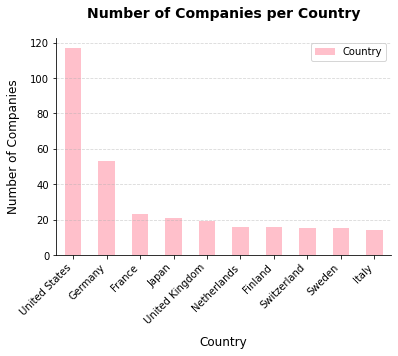

In [81]:
# Increase the figure size and adjust the spacing
plt.figure(figsize=(12, 8))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Plot the bar chart
df_countries.plot(kind='bar', x='index', y='Country', color='pink')

# Set the labels and title
plt.xlabel('Country', fontsize=12, labelpad=10)
plt.ylabel('Number of Companies', fontsize=12, labelpad=10)
plt.title('Number of Companies per Country', fontsize=14, fontweight='bold', pad=20)

# Adjust the font size and rotation of the x-axis labels
plt.xticks(fontsize=10, rotation=45, ha='right')

# Adjust the font size of the y-axis labels
plt.yticks(fontsize=10)

# Remove the top and right spines (borders)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add grid lines to the plot
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

### Industries:

In [82]:
df_industries = database3['Industry'].value_counts()
df_industries = df_industries.to_frame().reset_index()

<Figure size 1152x576 with 0 Axes>

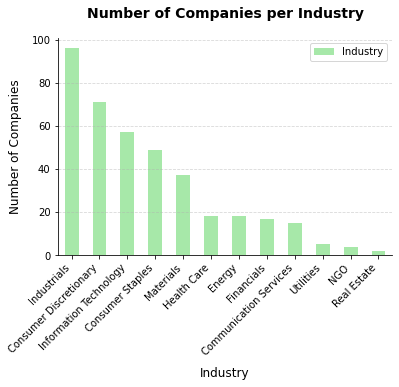

In [83]:
import matplotlib.pyplot as plt

# Increase the figure size and adjust the spacing
plt.figure(figsize=(16, 8))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Plot the bar chart
df_industries.plot(kind='bar', x='index', y='Industry', color='#a7e8a9')

# Set the labels and title
plt.xlabel('Industry', fontsize=12, labelpad=10)
plt.ylabel('Number of Companies', fontsize=12, labelpad=10)
plt.title('Number of Companies per Industry', fontsize=14, fontweight='bold', pad=20)

# Adjust the font size and rotation of the x-axis labels
plt.xticks(fontsize=10, rotation=45, ha='right')

# Adjust the font size of the y-axis labels
plt.yticks(fontsize=10)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add grid lines to the plot
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

### Size

In [84]:
df_size = database3['Размер компании'].value_counts()
df_size = df_size.to_frame().reset_index()

<Figure size 1008x576 with 0 Axes>

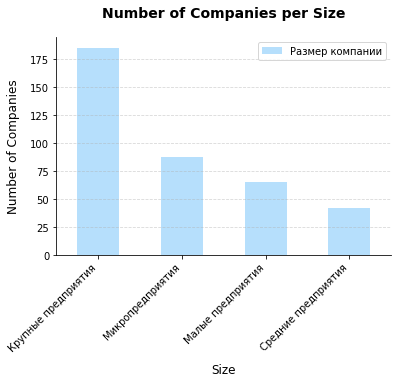

In [85]:
import matplotlib.pyplot as plt

# Increase the figure size and adjust the spacing
plt.figure(figsize=(14, 8))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Plot the bar chart
df_size.plot(kind='bar', x='index', y='Размер компании', color='#b6dffc')

# Set the labels and title
plt.xlabel('Size', fontsize=12, labelpad=10)
plt.ylabel('Number of Companies', fontsize=12, labelpad=10)
plt.title('Number of Companies per Size', fontsize=14, fontweight='bold', pad=20)

# Adjust the font size and rotation of the x-axis labels
plt.xticks(fontsize=10, rotation=45, ha='right')

# Adjust the font size of the y-axis labels
plt.yticks(fontsize=10)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add grid lines to the plot
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

In [86]:
database3.head()

,Company,Industry,Country,Action,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,"2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB"
0,"EBBVI, OOO",Health Care,United States,"['suspend', 'aesthetics', 'operations', ',', '...",2,10.5,Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1.025459e+10,9.951071e+09,1.020822e+10,1.103842e+10,1.010707e+10,3.976700e+07,1.156120e+08,-9.847700e+07,4.366250e+08,4.927860e+08
1,"ALS, AO",Materials,France,"['some', 'clients', 'no', 'longer', 'supplied'...",0,17.5,Производство промышленных газов,Непубличные акционерные общества,Совместная частная и иностранная собственность,Крупные предприятия,4.241597e+09,4.085493e+09,4.219756e+09,4.261008e+09,3.935799e+09,1.758438e+09,1.923752e+09,2.082180e+09,2.148197e+09,2.038560e+09
3,"FUDZHIFILM RUS, OOO",Information Technology,Japan,"['suspended', 'some', 'shipments']",0,29.0,Торговля оптовая неспециализированная,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,3.178782e+09,3.672729e+09,2.898280e+09,2.800149e+09,3.410160e+09,1.175040e+08,4.929400e+07,1.880410e+08,2.654330e+08,4.462840e+08
5,"UPDK-KHAINS, OOO",Industrials,United States,"['suspend', 'new', 'investments', 'in', 'russia']",2,31.0,Управление недвижимым имуществом за вознагражд...,Общества с ограниченной ответственностью,Федеральная собственность,NaN,NaN,NaN,NaN,NaN,NaN,-2.700000e+04,-6.570000e+05,-4.730000e+05,-1.150000e+05,-8.300000e+04
6,"ID LOGISTIKS RUS, OOO",Industrials,France,"['suspend', 'new', 'investment', 'in', 'russia']",2,12.5,Деятельность по складированию и хранению,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1.230715e+09,1.627697e+09,2.572849e+09,2.239789e+09,2.639568e+09,8.034900e+07,-7.945400e+07,-1.681290e+08,6.518300e+07,1.402440e+08


### Age

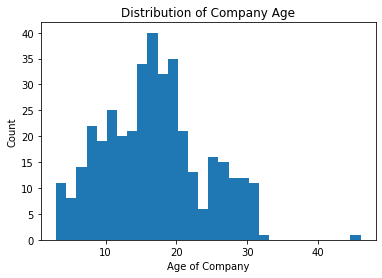

In [87]:
database3['Возраст компании, лет'].plot(kind='hist', bins=30)

plt.xlabel('Age of Company')
plt.ylabel('Count')
plt.title('Distribution of Company Age')

plt.show()

### Organisational form

In [88]:
df_form = database3['Организационно-правовая форма'].value_counts().head(5)
df_form = df_form.to_frame().reset_index()
df_form

,index,Организационно-правовая форма
0,Общества с ограниченной ответственностью,332
1,Непубличные акционерные общества,43
2,Публичные акционерные общества,9
3,Объединения юридических лиц,2
4,Некоммерческие партнерства,1


<Figure size 720x360 with 0 Axes>

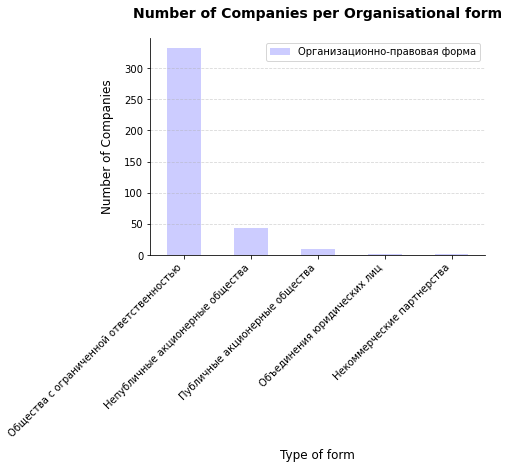

In [89]:
# Increase the figure size and adjust the spacing
plt.figure(figsize=(10, 5))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Plot the bar chart
df_form.plot(kind='bar', x='index', y='Организационно-правовая форма', color='#ccccff')

# Set the labels and title
plt.xlabel('Type of form', fontsize=12, labelpad=10)
plt.ylabel('Number of Companies', fontsize=12, labelpad=10)
plt.title('Number of Companies per Organisational form', fontsize=14, fontweight='bold', pad=20)

# Adjust the font size and rotation of the x-axis labels
plt.xticks(fontsize=10, rotation=45, ha='right')

# Adjust the font size of the y-axis labels
plt.yticks(fontsize=10)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add grid lines to the plot
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

### Form of property

In [90]:
df_form2 = database3['Форма собственности'].value_counts().head(5)
df_form2 = df_form2.to_frame().reset_index()
df_form2

,index,Форма собственности
0,Собственность иностранных юридических лиц,245
1,Частная собственность,107
2,Совместная частная и иностранная собственность,29
3,Федеральная собственность,2
4,Смешанная российская собственность с долей фед...,2


<Figure size 720x360 with 0 Axes>

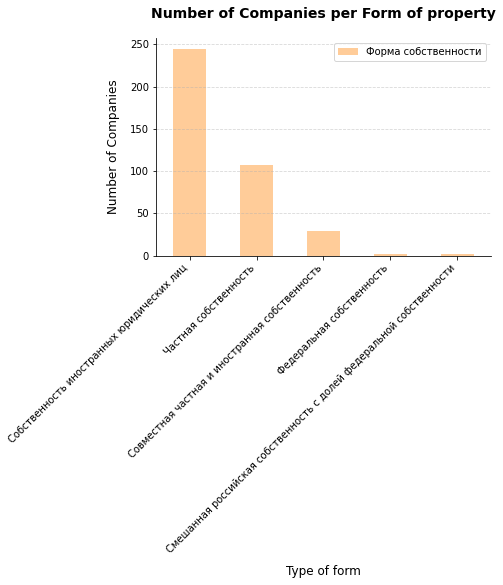

In [91]:
# Increase the figure size and adjust the spacing
plt.figure(figsize=(10, 5))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Plot the bar chart
df_form2.plot(kind='bar', x='index', y='Форма собственности', color='#ffcc99')

# Set the labels and title
plt.xlabel('Type of form', fontsize=12, labelpad=10)
plt.ylabel('Number of Companies', fontsize=12, labelpad=10)
plt.title('Number of Companies per Form of property', fontsize=14, fontweight='bold', pad=20)

# Adjust the font size and rotation of the x-axis labels
plt.xticks(fontsize=10, rotation=45, ha='right')

# Adjust the font size of the y-axis labels
plt.yticks(fontsize=10)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add grid lines to the plot
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

### Tone
   

In [92]:
df_tone = database3['Tone'].value_counts().head(5)
df_tone = df_tone.to_frame().reset_index()
df_tone

,index,Tone
0,0,219
1,2,155
2,1,15


<Figure size 720x360 with 0 Axes>

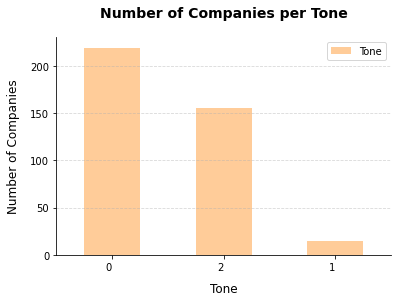

In [97]:
# Increase the figure size and adjust the spacing
plt.figure(figsize=(10, 5))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Plot the bar chart
df_tone.plot(kind='bar', x='index', y='Tone', color='#ffcc99')

# Set the labels and title
plt.xlabel('Tone', fontsize=12, labelpad=10)
plt.ylabel('Number of Companies', fontsize=12, labelpad=10)
plt.title('Number of Companies per Tone', fontsize=14, fontweight='bold', pad=20)

# Adjust the font size and rotation of the x-axis labels
plt.xticks(fontsize=10, rotation=0, ha='right')

# Adjust the font size of the y-axis labels
plt.yticks(fontsize=10)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add grid lines to the plot
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()